In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

In [2]:
train_dir = 'Rock-Paper-Scissors/train'
test_dir = 'Rock-Paper-Scissors/test'

# Visualizing Image Augmentation

In [3]:
sample_generator = ImageDataGenerator(
    rescale=1./255,
    vertical_flip=True,
    horizontal_flip=True,
    rotation_range=90,
    height_shift_range=0.2,
    width_shift_range=0.2,
    zoom_range=0.2,
    fill_mode='constant'
)

sample_images = sample_generator.flow_from_directory(
    train_dir,
    target_size=(300, 300),
    color_mode='rgb',
    class_mode=None,
    batch_size=1,
    shuffle=True,
    seed=42
)

Found 2520 images belonging to 3 classes.


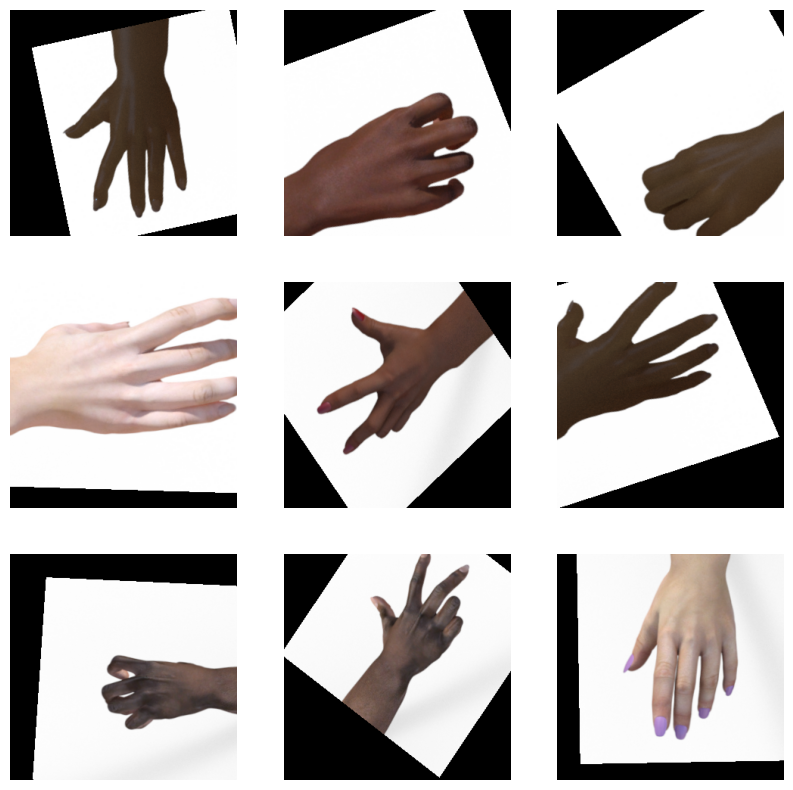

In [4]:
plt.figure(figsize=(10, 10))
for i in range(9):
    plt.subplot(3, 3, i+1)
    img = sample_images.next()[0]
    plt.imshow(img)
    plt.axis('off')
plt.show()

Here we use *fill_mode='constant'* for the sake of vizualization. *'nearest'* will be used for the next gererators.

# Creating Generators

In [5]:
train_generator = ImageDataGenerator(
    rescale=1./255,
    vertical_flip=True,
    horizontal_flip=True,
    rotation_range=90,
    height_shift_range=0.2,
    width_shift_range=0.2,
    zoom_range=0.2,
    fill_mode='nearest'
)

test_generator = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.7
)

In [6]:
train_images = train_generator.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    color_mode='rgb',
    class_mode='categorical',
    batch_size=32,
    shuffle=True,
    seed=42
)

val_images = test_generator.flow_from_directory(
    test_dir,
    target_size=(150, 150),
    color_mode='rgb',
    class_mode='categorical',
    batch_size=32,
    shuffle=True,
    seed=42,
    subset='training'
)

test_images = test_generator.flow_from_directory(
    test_dir,
    target_size=(150, 150),
    color_mode='rgb',
    class_mode='categorical',
    batch_size=32,
    shuffle=False,
    seed=42,
    subset='validation'
)

Found 2520 images belonging to 3 classes.
Found 114 images belonging to 3 classes.
Found 258 images belonging to 3 classes.


# Training

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')
])

model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

history = model.fit(
    train_images,
    validation_data=val_images,
    epochs=100,
    
)

Epoch 1/100
79/79 [==============================] - 128s 2s/step - loss: 1.0969 - accuracy: 0.3571 - val_loss: 1.0962 - val_accuracy: 0.3333
Epoch 2/100
79/79 [==============================] - 69s 864ms/step - loss: 1.0520 - accuracy: 0.4290 - val_loss: 0.9504 - val_accuracy: 0.6053
Epoch 3/100
79/79 [==============================] - 66s 838ms/step - loss: 0.8823 - accuracy: 0.5690 - val_loss: 0.5717 - val_accuracy: 0.8158
Epoch 4/100
79/79 [==============================] - 63s 794ms/step - loss: 0.6909 - accuracy: 0.6972 - val_loss: 0.3545 - val_accuracy: 0.8333
Epoch 5/100
79/79 [==============================] - 65s 824ms/step - loss: 0.4853 - accuracy: 0.7980 - val_loss: 0.1710 - val_accuracy: 0.9561
Epoch 6/100
79/79 [==============================] - 63s 797ms/step - loss: 0.4037 - accuracy: 0.8437 - val_loss: 0.1221 - val_accuracy: 0.9386
Epoch 7/100
79/79 [==============================] - 65s 826ms/step - loss: 0.3362 - accuracy: 0.8714 - val_loss: 0.0808 - val_accuracy: 1

# Results

In [10]:
y_pred = np.argmax(model.predict(test_images), axis=1)
y_true = test_images.labels
test_images.class_indices

9/9 [==============================] - 7s 836ms/step


{'paper': 0, 'rock': 1, 'scissors': 2}

In [11]:
acc = accuracy_score(y_true, y_pred)
print("Accuracy = {:.2f}%".format(acc*100))

Accuracy = 96.51%


In [12]:
cm = confusion_matrix(y_true, y_pred, labels=[0, 1, 2])
clr = classification_report(y_true, y_pred, labels=[0, 1, 2], target_names=['Paper', 'Rock', 'Scissors'])

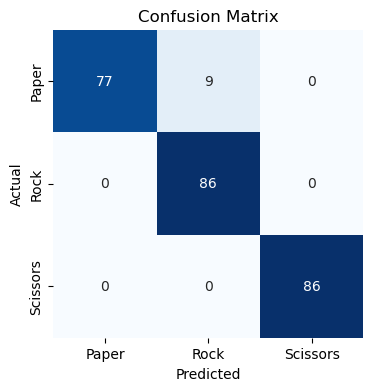

              precision    recall  f1-score   support

       Paper       1.00      0.90      0.94        86
        Rock       0.91      1.00      0.95        86
    Scissors       1.00      1.00      1.00        86

    accuracy                           0.97       258
   macro avg       0.97      0.97      0.97       258
weighted avg       0.97      0.97      0.97       258



In [13]:
plt.figure(figsize=(4, 4))
sns.heatmap(cm, annot=True, fmt='g', vmin=0, cmap='Blues', cbar=False)
plt.xticks(ticks=[0.5, 1.5, 2.5], labels=['Paper', 'Rock', 'Scissors'])
plt.yticks(ticks=[0.5, 1.5, 2.5], labels=['Paper', 'Rock', 'Scissors'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

print(clr)